# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [4]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [8]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [10]:
#Merging city and ride data
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.dtypes

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [11]:
#Urban City
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
#Subrban City
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [13]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [14]:
#  1. Get the total rides for each city type
total_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [15]:
# 2. Get the total drivers for each city type
total_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [16]:
#  3. Get the total amount of fares for each city type
total_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city_type.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [19]:
#  4. Get the average fare per ride for each city type. 
fareperride_avg_city = total_fares_by_city_type / total_rides_by_city_type
fareperride_avg_city

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [22]:
# 5. Get the average fare per driver for each city type. 
fareperdriver_avg_city = total_fares_by_city_type / total_drivers_by_city_type
fareperdriver_avg_city

Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [28]:
#  6. Create a PyBer summary DataFrame. 
total_rides_by_city_type.index.name = None
total_rides_by_city_type

total_drivers_by_city_type.index.name = None
total_drivers_by_city_type

total_fares_by_city_type.index.name = None
total_fares_by_city_type

Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [29]:
pyber_summary_df = pd.DataFrame()

pyber_summary_df["Total Rides"] = total_rides_by_city_type
pyber_summary_df["Total Drivers"] = total_drivers_by_city_type
pyber_summary_df["Total Fares"] = total_fares_by_city_type
pyber_summary_df["Average Fare per Ride"] = fareperride_avg_city
pyber_summary_df["Average Fare per Driver"] = fareperdriver_avg_city

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [30]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [32]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [148]:
# 1. Read the merged DataFrame
#Correcting lables
pyber_data_df = pyber_data_df.rename(columns =
                                     {"city": "City",
                                     "date": "Date", 
                                     "fare": "Fare", 
                                     "ride_id": "Ride Id",
                                     "driver_count": "No. Drivers",
                                     "type": "City Type"})

pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [149]:
#Step 1: Create new data frame

sum_fare_by_type = pyber_data_df.groupby(["City Type", "Date"]).sum()[["Fare"]]
sum_fare_by_type.head(10)

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
          2019-01-08 06:19:45  19.39
          2019-01-09 15:30:35  31.84
          2019-01-11 04:39:27  16.42
          2019-01-14 07:09:17  18.05
          2019-01-14 15:58:48  54.10

In [150]:
# Step 2: Reset index
sum_fare_by_type = sum_fare_by_type.reset_index()
sum_fare_by_type.head()

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [151]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
#Step 3: Set up Pivot

sum_fare_by_type_pivot = sum_fare_by_type.pivot(index="Date", columns="City Type", values="Fare")
sum_fare_by_type_pivot.head(10)



City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [152]:
#Step 3: Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
sum_fare_by_type_pivot.index =pd.to_datetime(sum_fare_by_type_pivot.index)
sum_fare_by_type_pivot

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [154]:
#Loc Function
jan_to_april=sum_fare_by_type_pivot.loc['2019-01-01':'2019-04-28']

In [155]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_to_april.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [156]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_of_fares_weekly = jan_to_april.resample("W").sum()
sum_of_fares_weekly

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


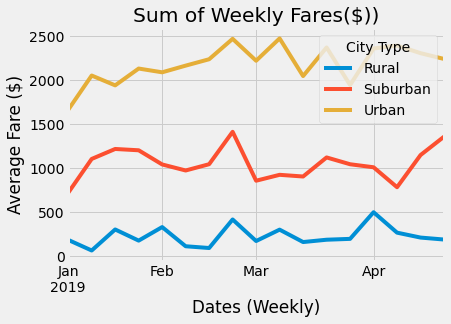

In [161]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

sum_of_fares_weekly.plot()
plt.title("Sum of Weekly Fares($))")
plt.ylabel("Average Fare ($)")
plt.xlabel("Dates (Weekly)")
plt.savefig("analysis/PyBer_fare_summary.png")